Authors: Dillon D, Elaine C, Harnish S, Rajashree C  
Organized by: Elaine C

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1. Read Data

In [2]:
spotify = pd.read_csv('../Data/SpotifyFeatures.csv')
spotify.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
87558,Rap,J. Cole,Love Yourz,4gkl7QbQvBd3TM9PhlWFkI,73,0.609000,0.502,211680,0.623,0.000000,G#,0.1190,-8.812,Major,0.4410,75.555,1/4,0.399
64085,Folk,The Moody Blues,Tuesday Afternoon (Forever Afternoon),31pi9vJJWHZxygk8AoGd0d,48,0.102000,0.493,249004,0.312,0.024000,C,0.2480,-13.207,Major,0.0295,113.563,4/4,0.319
59717,R&B,K CAMP,Racks Like This (feat Moneybagg Yo),0RYyJZxgtwVrveWbRzcTAO,51,0.041400,0.934,184800,0.739,0.000004,C,0.1560,-6.036,Minor,0.0708,129.998,4/4,0.830
38300,Electronic,The The,Dogs Of Lust,4iiZguRzsPF0y4kfoMbBlD,30,0.000693,0.414,188867,0.881,0.732000,A,0.3480,-5.039,Major,0.0328,162.038,4/4,0.756
97885,Children’s Music,Michael W. Smith,Washed Away / Nothing but the Blood,1wskdp18OIg3LZeuSGRwrw,54,0.153000,0.496,360594,0.439,0.000006,A,0.0919,-9.142,Major,0.0316,147.887,4/4,0.199


In [3]:
spotify.isnull().sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

## Step 2. Data Cleaning

In [4]:
## Citation from RJ
spotify[spotify['track_name'].isna()]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
208285,World,Elevation Worship,NaN,7BGQCe62A58Q5ZgpQFX93t,44,0.019,0.287,350027,0.446,0.0,F,0.1,-7.214,Major,0.0317,138.727,4/4,0.0387


In [5]:
## Search trackid on spotify the song's name is None
spotify['track_name'] = spotify['track_name'].fillna('None')

## Step 3. Exploratory Data Analysis

In [6]:
spotify.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [7]:
# Convert the milliseconds to minutes
spotify['duration_min'] = spotify['duration_ms']/60_000
spotify.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
duration_min        float64
dtype: object

In [8]:
# Drop duration_ms
spotify.drop(columns = ['duration_ms'], inplace = True)

### 1) Numeric Features

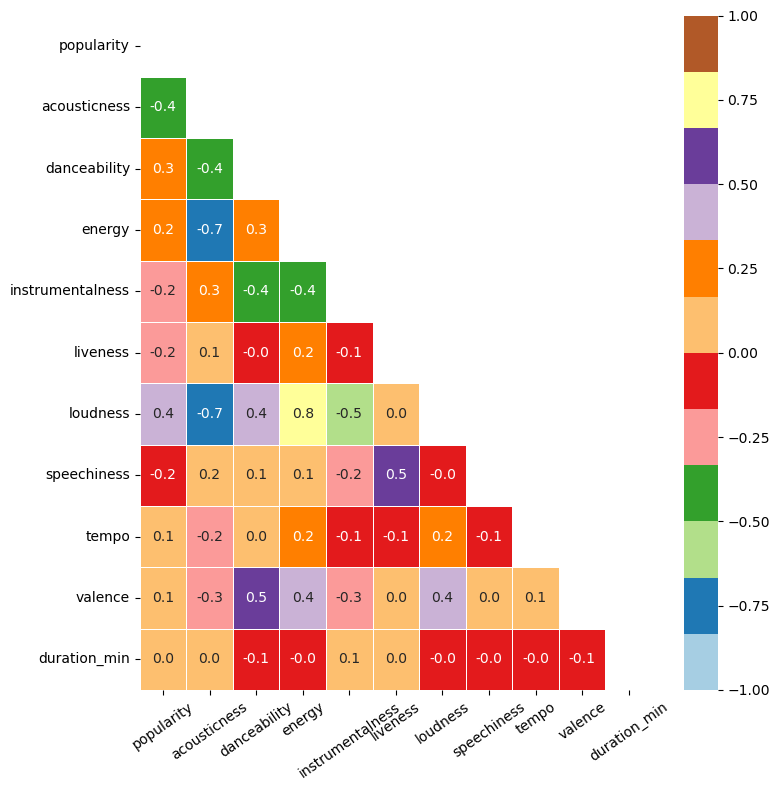

In [11]:
# Citation from Elaine, cmap changed
# Numeric feasures correlation heatmap
plt.figure(figsize=(8,8))
corr = spotify.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,annot=True,cmap='Paired', fmt=".1f", linewidths=.5, vmin=-1, vmax=1, mask = mask)
plt.xticks(rotation = 35)
plt.tight_layout()

plt.savefig('../Graphs/Numeric Features correlation heatmap.jpg', dpi = 200)
plt.show();

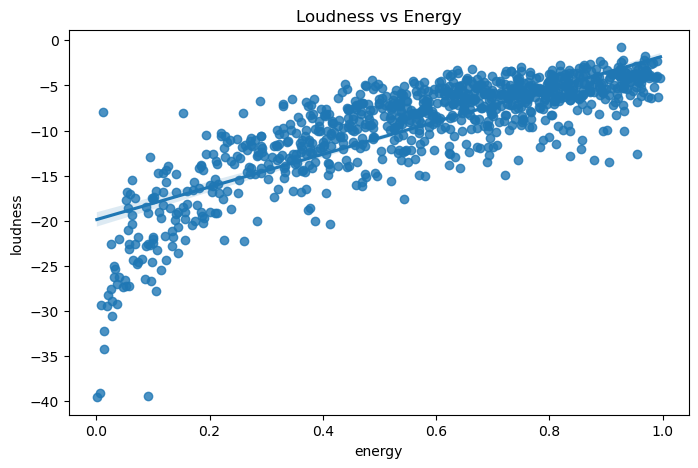

In [12]:
## Citation from Harnish
spotify_sample = spotify.sample(int(0.004*len(spotify)))
plt.figure(figsize=(8,5))
sns.regplot(data = spotify_sample, y= "loudness", x = "energy").set(title="Loudness vs Energy")
plt.savefig('../Graphs/Trend between high correlation Energy vs. Loudness.jpg', dpi = 200)

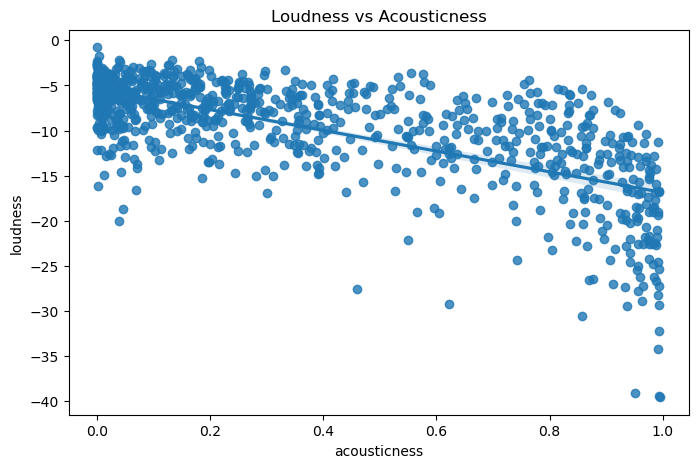

In [13]:
plt.figure(figsize=(8,5))
sns.regplot(data = spotify_sample, y= "loudness", x = "acousticness").set(title="Loudness vs Acousticness")
plt.savefig('../Graphs/Trend between high correlation Loudness vs. Acousticness.jpg', dpi = 200)

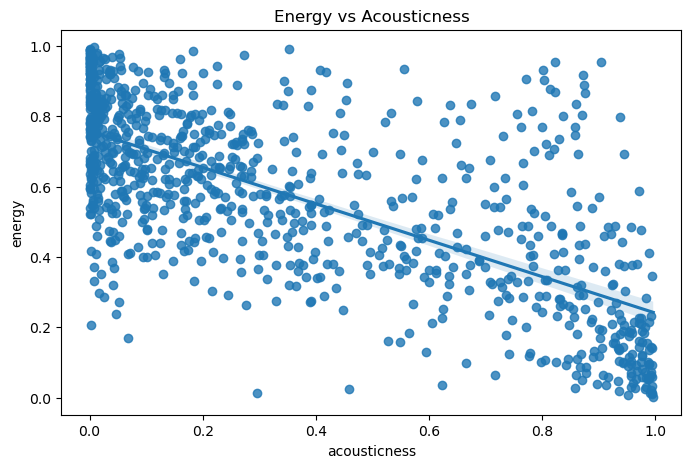

In [14]:
plt.figure(figsize=(8,5))
sns.regplot(data = spotify_sample, y= "energy", x = "acousticness").set(title="Energy vs Acousticness")
plt.savefig('../Graphs/Trend between high correlation Energy vs. Acousticness.jpg', dpi = 200)

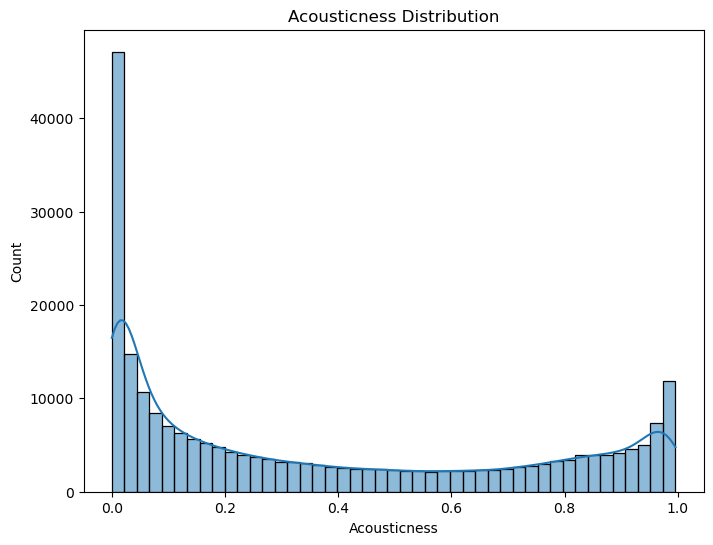

In [15]:
## Citation from RJ
plt.figure(figsize=(8, 6))
sns.histplot(spotify["acousticness"], kde=True)
plt.title("Acousticness Distribution")
plt.xlabel("Acousticness")
plt.ylabel("Count")

plt.savefig('../Graphs/Acousticness Distribution.jpg', dpi = 200)
plt.show();

/Users/yilan.c/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/4g/t9m4gw7n7dx1x3j6srwz6zqm0000gn/T/ipykernel_35962/3945101249.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

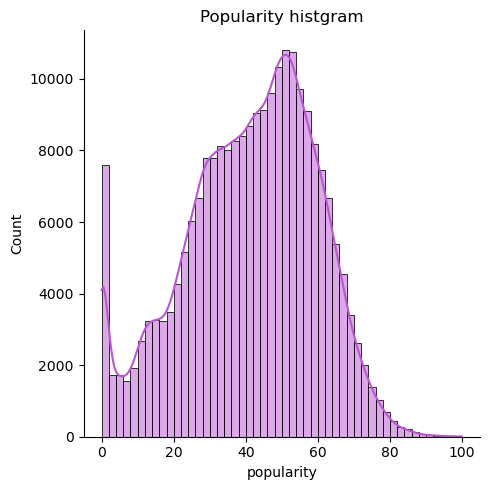

In [17]:
## Citation from Elaine
plt.figure(figsize=(12,8))
sns.displot(spotify['popularity'],bins=50,kde = True,color = 'mediumorchid')
plt.title('Popularity histgram')
plt.margins(x=0.05, y=0.05)  # Decrease white edge
plt.tight_layout() 

plt.savefig('../Graphs/Popularity Histgram.jpg', dpi =200)
plt.show()

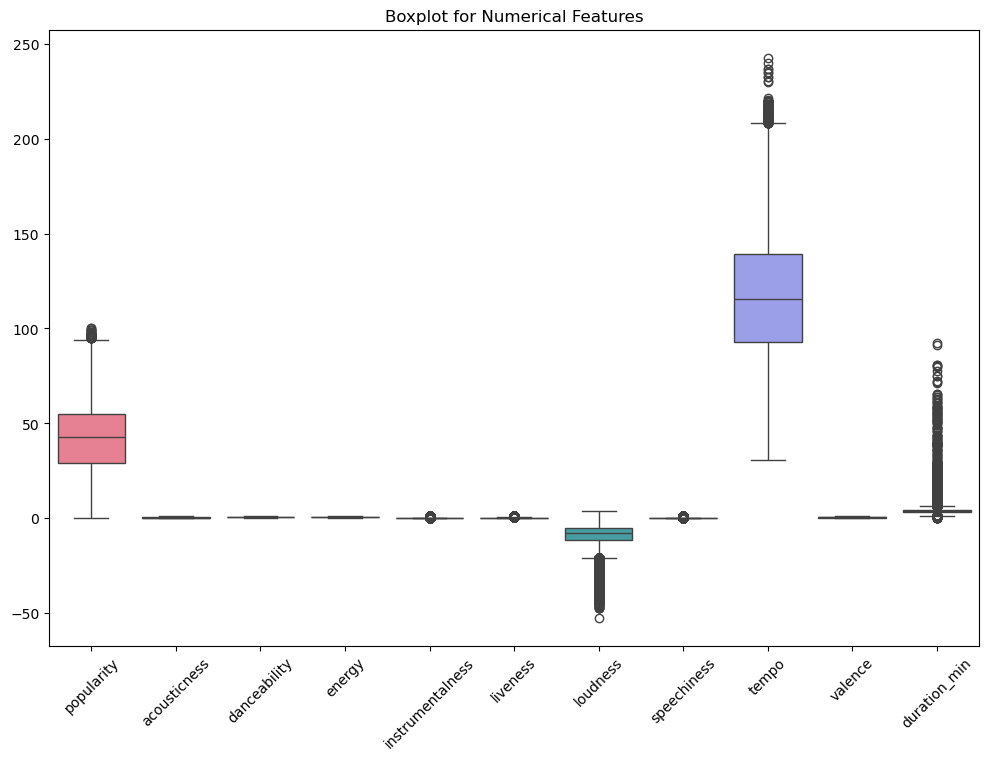

In [18]:
## Citation from RJ
#for numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=spotify.drop(columns=["track_name", "track_id", "mode", "time_signature"]))
plt.title("Boxplot for Numerical Features")
plt.xticks(rotation=45)

plt.savefig('../Graphs/Boxplot for Numerical Features.jpg', dpi = 200)
plt.show();

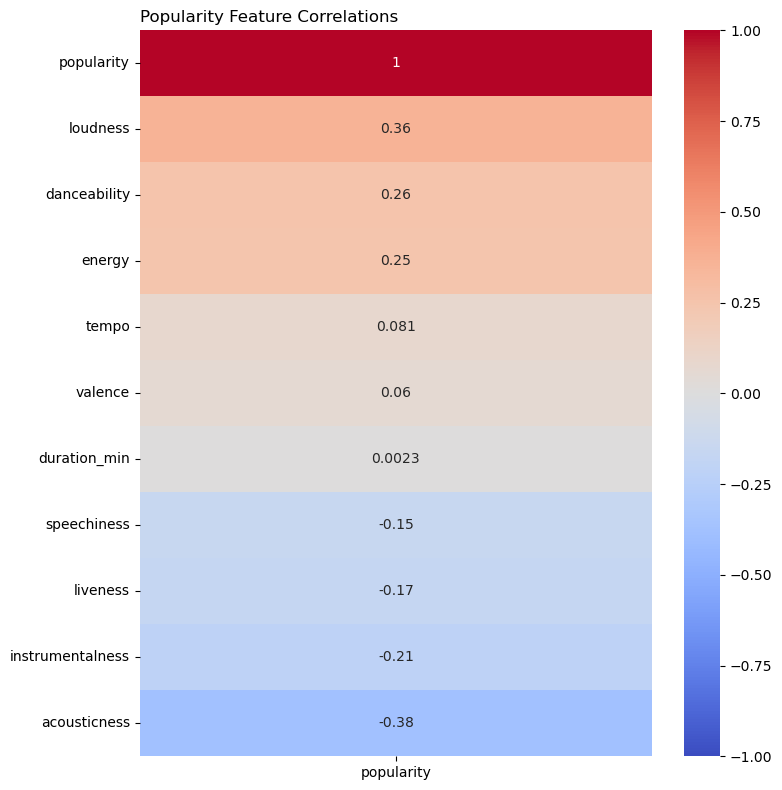

In [19]:
# Citation from Dillon, changed cmap
# Numeric features with popularity feature correlation
plt.figure(figsize = (8,8))
sns.heatmap(
    spotify.corr(numeric_only=True)[['popularity']].sort_values(by='popularity',ascending =False), 
    annot=True, 
    cmap='coolwarm',
    vmin = -1
)
plt.title('Popularity Feature Correlations', loc='left')
plt.tight_layout()
plt.savefig('../Graphs/Spotify_Popul_Corrs.jpg', dpi = 200)

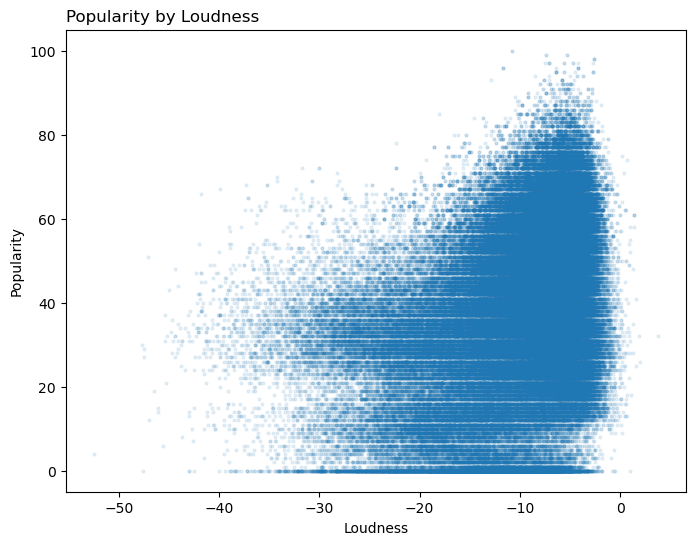

In [20]:
# Citation from Dillon
plt.figure(figsize = (8,6))
plt.scatter(spotify['loudness'], spotify['popularity'], alpha=.1, s=4)
plt.title('Popularity by Loudness', loc='left')
plt.xlabel('Loudness')
plt.ylabel('Popularity')

plt.savefig('../Graphs/Relation between Loudness and Popularity.jpg', dpi = 200)
plt.show();

### 2) Character Features

/var/folders/4g/t9m4gw7n7dx1x3j6srwz6zqm0000gn/T/ipykernel_35962/701768883.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdPu')


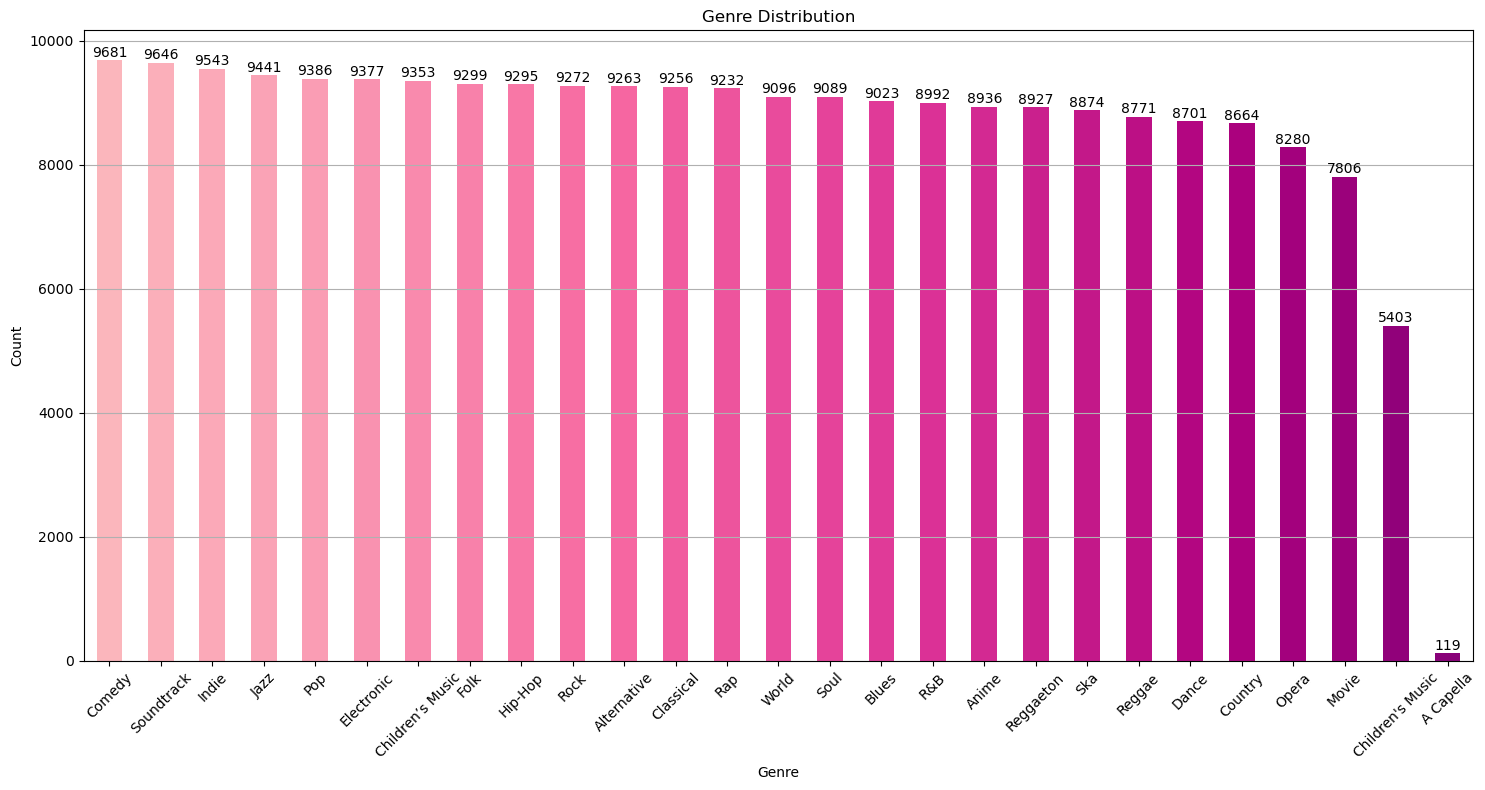

In [21]:
## Citation from RJ
colors = np.linspace(0.3, 0.9, 30)  
cmap = plt.cm.get_cmap('RdPu')  

plt.figure(figsize=(15, 8))
genre_counts = spotify['genre'].value_counts()
genre_counts.plot(kind='bar', color=cmap(colors))

for i, count in enumerate(genre_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.grid(axis='y')
plt.tight_layout()


plt.savefig('../Graphs/Genre Distribution.jpg', dpi =200)
plt.show();

/var/folders/4g/t9m4gw7n7dx1x3j6srwz6zqm0000gn/T/ipykernel_35962/3135275727.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=spotify, x='duration_min', y="genre", palette = 'Set2')


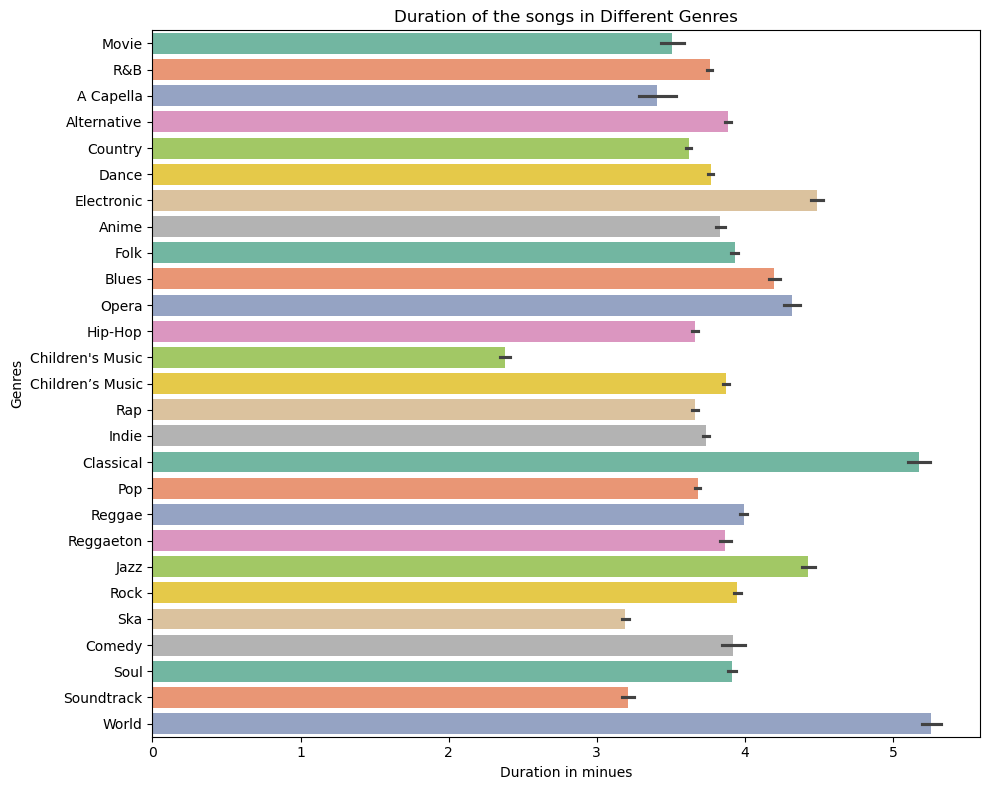

In [22]:
## Citation from Elaine
plt.figure(figsize = (10,8))
sns.barplot(data=spotify, x='duration_min', y="genre", palette = 'Set2')
sns.color_palette(as_cmap=True)
plt.title("Duration of the songs in Different Genres")
plt.xlabel("Duration in minues")
plt.ylabel("Genres")
plt.tight_layout()

plt.savefig('../Graphs/Duration of Songs in Different Genres.jpg', dpi=200)
plt.show();

/var/folders/4g/t9m4gw7n7dx1x3j6srwz6zqm0000gn/T/ipykernel_35962/1307195962.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="genre", y="energy", data=spotify, palette = 'Set2')


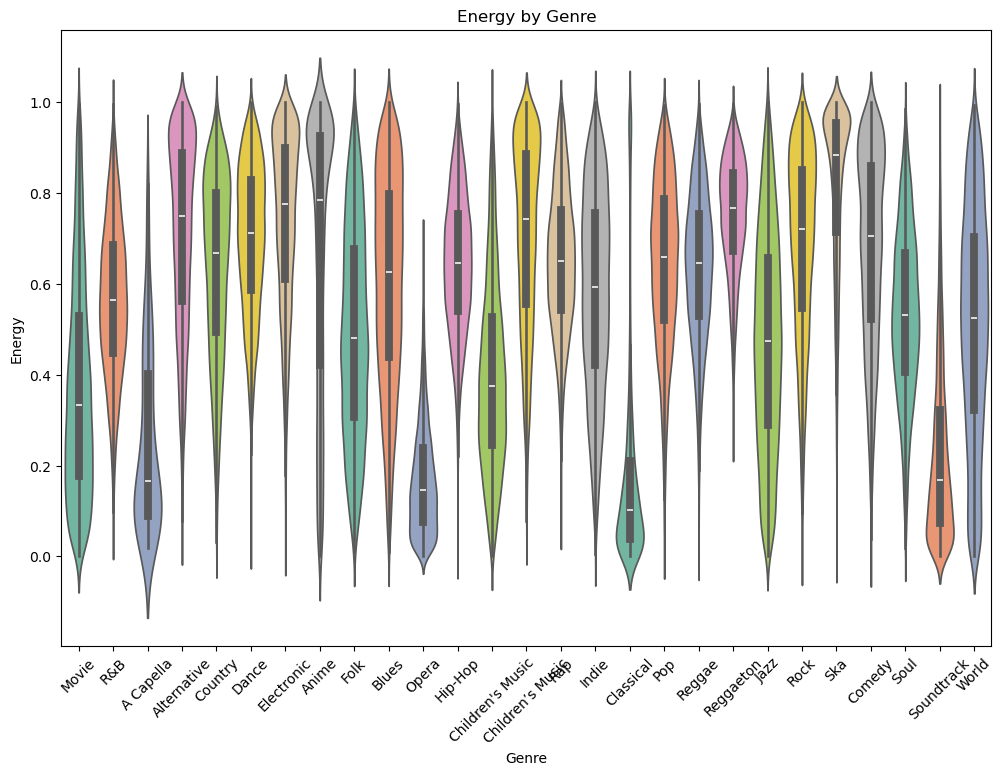

In [23]:
#Citation from RJ
#Violin plot - Energy by Genre
plt.figure(figsize=(12,8))
sns.violinplot(x="genre", y="energy", data=spotify, palette = 'Set2')
plt.title("Energy by Genre")
plt.xlabel("Genre")
plt.ylabel("Energy")
plt.xticks(rotation=45)

plt.savefig('../Graphs/Violin Plot Energy in Different Genre.png', dpi = 200)
plt.show();

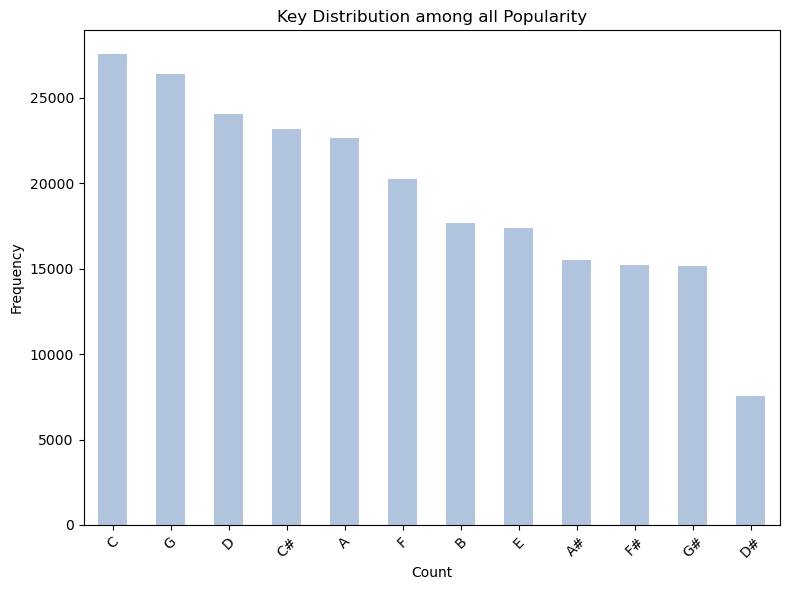

In [24]:
# Citation from Elaine
plt.figure(figsize = (8,6))
spotify['key'].value_counts().plot(kind='bar', color = 'lightsteelblue')
plt.xlabel('Count')
plt.xticks(rotation = 45)
plt.ylabel('Frequency')
plt.title('Key Distribution among all Popularity')
plt.tight_layout()

plt.savefig('../Graphs/Key Distribution among all Popularity.jpg', dpi = 200)
plt.show();

### Look Close to Data

In [22]:
top_20_artists = spotify[['artist_name','popularity']].groupby('artist_name').sum().sort_values('popularity', ascending=False).head(20)
top_20_artists

,popularity
artist_name,
Drake,31703
Chris Brown,22047
Nobuo Uematsu,19710
Future,19590
Hans Zimmer,19439
Eminem,18876
Giuseppe Verdi,18580
Wolfgang Amadeus Mozart,17785
Howard Shore,17283


In [23]:
unpopular_songs_10 = spotify[['track_name','artist_name','popularity','genre']].groupby('track_name').sum().sort_values('popularity', ascending = True).head(10)
unpopular_songs_10

,artist_name,popularity,genre
track_name,,,
"Piano Sonata No. 8 in C Minor, Op. 13 ""Pathétique"": II. Adagio cantabile",Ludwig van Beethoven,0,Classical
Making Music With My Friends,The Outback Aussie Show,0,Children's Music
Making Music Together,Ella Jenkins,0,Children's Music
Décès de Léo Ferré (Interview),Francis Lalanne,0,Movie
Dé ti mo dou,Céline Languedoc,0,Movie
Making Believe,Emmylou Harris,0,Country
"Makin' Pies - From ""Snow White and the Seven Dwarfs""/Score",Frank Churchill,0,Movie
Makin' Music,Grover,0,Children's Music
Dès le surlendemain de l'arrivée,Jean Piat,0,Movie


In [26]:
top_10_popular = spotify.sort_values('popularity', ascending = False).head(10)
top_10_popular

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319,2.977333
107804,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319,2.977333
86951,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385,2.492000
107803,Pop,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385,2.492000
107802,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335,3.174000
9026,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335,3.174000
66643,Hip-Hop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656,3.220450
107909,Pop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656,3.220450
138918,Reggaeton,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656,3.220450
107829,Pop,Ava Max,Sweet but Psycho,25sgk305KZfyuqVBQIahim,97,0.0691,0.719,0.704,0.000000,C#,0.1660,-4.724,Major,0.0476,133.002,4/4,0.628,3.123933
